In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/engineer/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/home/engineer/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/engineer/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/engineer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(144, 1)
(143, 1)
[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]]
100
Epoch 1/30
100/100 [==============================] - 1s 15ms/step - loss: 0.0352
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 9/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 10/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 11/30
100/100 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 12/30
1

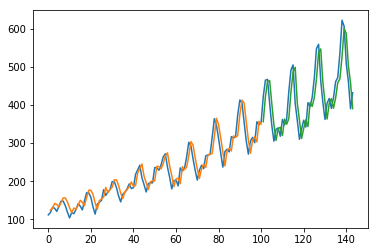

In [4]:
#using RNN LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dropout
data = pd.read_csv("/home/engineer/Kaggle_dataset/AirPassengers.csv")

look_forward = 1 # how far dow we want to look and then predict 
data_ = data.iloc[:,1:2].values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data_)

X = []
Y = []

#creating a dataset on the basis of how forward do we wish to look and predict. 
#Right now we only train our model  on the basis on the next element in the series
for i in range(len(dataset) - look_forward):
    X.append(dataset[i:i+look_forward,0])
    Y.append(dataset[i+look_forward,0])

X = np.array(X)
Y = np.array(Y)

#slpit for train and test arrays
split_ = 0.7

len_ = int(len(X)*split_)

x_train = X[0:len_]
y_train = Y[0:len_]
x_test = X[len_:]
y_test = Y[len_:]

x_train = np.reshape(x_train, (np.shape(x_train)[0], np.shape(x_train)[1],1))
x_test = np.reshape(x_test, (np.shape(x_test)[0], np.shape(x_test)[1],1))

model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=30, batch_size=1, verbose=1)


train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_forward:len(train_pred)+look_forward, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_forward):len(dataset), :] = test_pred

plt.plot(scaler.inverse_transform(dataset))
plt.plot((trainPredictPlot))
plt.plot((testPredictPlot))
plt.show()

/home/engineer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(144, 1)
(143, 1)
[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]]
114
(114, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
114/114 [==============================] - 1s 7ms/step - loss: 0.0535
Epoch 2/30
114/114 [==============================] - 0s 4ms/step - loss: 0.0316
Epoch 3/

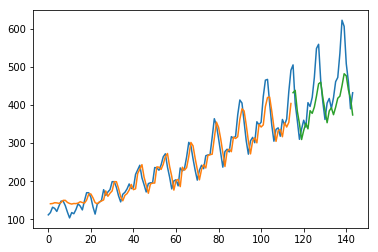

In [5]:
#using MLP

data = pd.read_csv("/home/engineer/Kaggle_dataset/AirPassengers.csv")

look_forward = 1
data_ = data.iloc[:,1:2].values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data_)

X = []
Y = []

for i in range(len(dataset) - look_forward):
    X.append(dataset[i:i+look_forward,0])
    Y.append(dataset[i+look_forward,0])

X = np.array(X)
Y = np.array(Y)

split_ = 0.8

len_ = int(len(X)*split_)


x_train = X[0:len_]
y_train = Y[0:len_]
x_test = X[len_:]
y_test = Y[len_:]

#x_train = np.reshape(x_train, (np.shape(x_train)[0], np.shape(x_train)[1],1))
#x_test = np.reshape(x_test, (np.shape(x_test)[0], np.shape(x_test)[1],1))
print(np.shape(x_train))
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=(1)))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=30, batch_size=1, verbose=1)


train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_forward:len(train_pred)+look_forward, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_forward):len(dataset), :] = test_pred

plt.plot(scaler.inverse_transform(dataset))
plt.plot((trainPredictPlot))
plt.plot((testPredictPlot))
plt.show()

/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


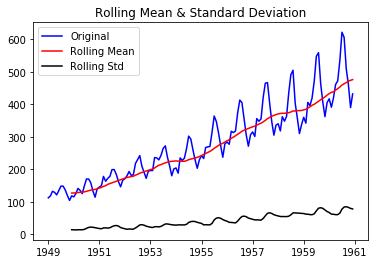

In [33]:
#ARIMA

from datetime import datetime

data = pd.read_csv("/home/engineer/Kaggle_dataset/AirPassengers.csv", parse_dates=['Month'], index_col='Month')
ts = data['#Passengers']
ts.head()
ts[datetime(1949,1,1)]

from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
  
    
test_stationarity(ts)

In [34]:
'''Though the variation in standard deviation is small, mean is clearly increasing with time and this is 
not a stationary series. 
'''

'Though the variation in standard deviation is small, mean is clearly increasing with time and this is \nnot a stationary series. \n'

/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys


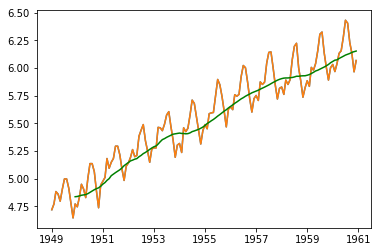

In [35]:
ts_log = np.log(ts)
plt.plot(ts_log)
'''
    Smoothing – taking rolling averages

'''
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='Green')

/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


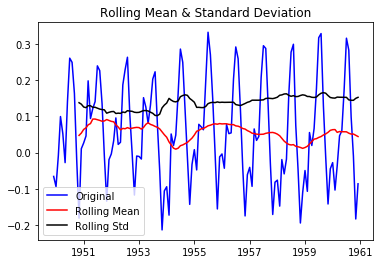

/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  


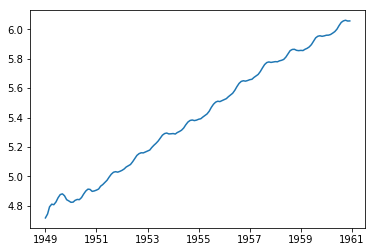

In [36]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
plt.subplot()
exp_weighted_moving_average = pd.ewma(ts_log, halflife=12)
plt.plot(exp_weighted_moving_average)

/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


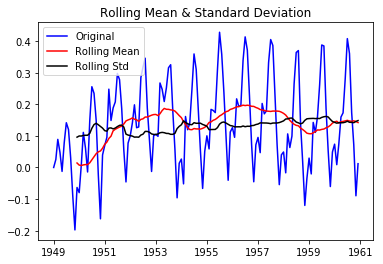

In [37]:
diff_exp_wei_moving_avg = ts_log - exp_weighted_moving_average
test_stationarity(diff_exp_wei_moving_avg)

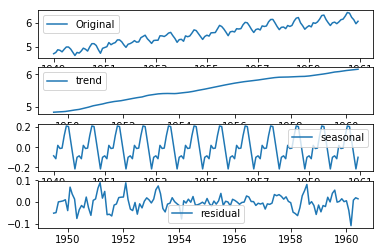

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = "trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = "seasonal")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = "residual")
plt.legend(loc='best')


/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


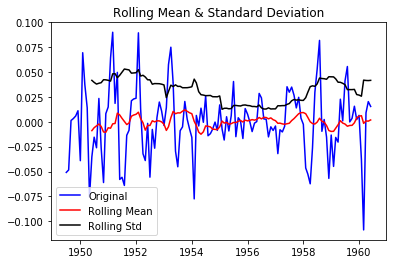

In [39]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


1


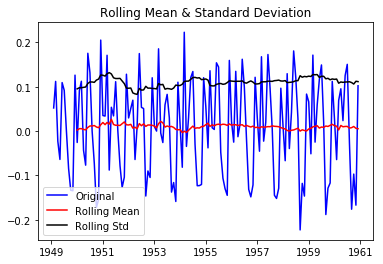

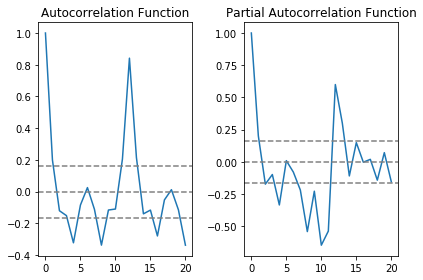

In [40]:



ts_log_diff = ts_log - ts_log.shift()
print(sum(ts_log_diff.isna()))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/home/engineer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/engineer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/engineer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


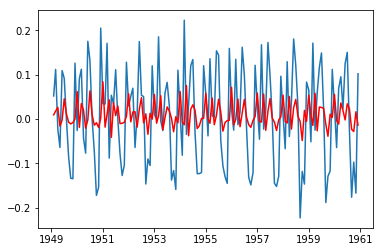

In [41]:
from statsmodels.tsa.arima_model import ARIMA

'''
AR Model
'''

model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1) 
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')



/home/engineer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/engineer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/engineer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


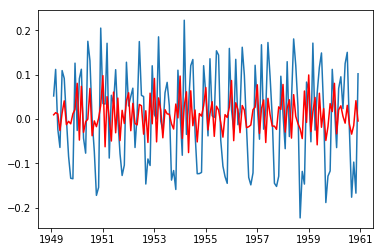

In [42]:


'''
MA Model

'''

model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')

/home/engineer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/engineer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/engineer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


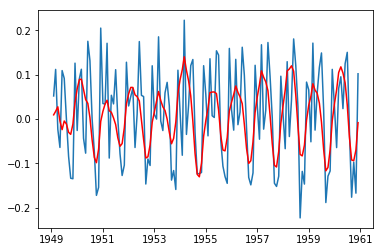

In [43]:
'''
Combined MOdel

'''
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')





/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


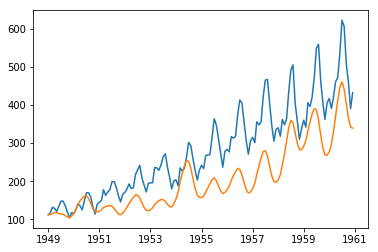

In [44]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)